# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [19]:
df = pd.read_csv('BaseM14_Atualizado_BaseM15')

df.head(10)

,id_cliente,genero,idoso,casado,dependentes,tempo_como_cliente,servico_telefone,servico_internet,servico_seguranca,suporte_tecnico,streamingtv,tipo_contrato,metodo_pagamento,pagamento_mensal,total_pago,churn
0,7590-vhveg,feminino,0,sim,nao,1,nao,dsl,nao,nao,nao,month-to-month,electronic check,29.85,29.85,nao
1,5575-gnvde,masculino,0,nao,nao,34,sim,dsl,sim,nao,nao,one year,mailed check,56.95,1889.50,nao
2,3668-qpybk,masculino,0,nao,nao,2,sim,dsl,sim,nao,nao,month-to-month,mailed check,53.85,108.15,sim
3,7795-cfocw,masculino,0,nao,nao,45,nao,dsl,sim,sim,nao,one year,bank transfer (automatic),71.45,1840.75,nao
4,8191-xwszg,f,0,nao,nao,52,sim,nao,sem servico de internet,sem servico de internet,sem servico de internet,one year,mailed check,71.45,1022.95,nao
5,9959-wofkt,masculino,0,nao,sim,71,sim,fiber optic,sim,nao,sim,two year,bank transfer (automatic),71.45,7382.25,nao
6,4190-mfluw,f,0,sim,sim,10,sim,dsl,nao,sim,nao,month-to-month,credit card (automatic),71.45,528.35,sim
7,4183-myfrb,f,0,nao,nao,21,sim,fiber optic,nao,nao,nao,month-to-month,electronic check,71.45,1862.90,nao
8,8779-qrdmv,masculino,1,nao,nao,1,nao,dsl,nao,nao,nao,month-to-month,electronic check,71.45,39.65,sim
9,1680-vdcww,masculino,0,sim,nao,12,sim,nao,sem servico de internet,sem servico de internet,sem servico de internet,one year,bank transfer (automatic),71.45,202.25,nao


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [12]:
df.describe()

,idoso,tempo_como_cliente,pagamento_mensal,total_pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


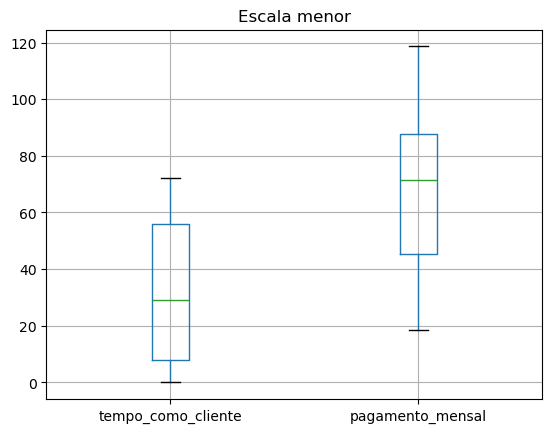

In [59]:
#é possivel notar um valor maximo em algumas colunas muito acima da media, usarei o boxplot para verificar a presença de outliers
plt.clf()
df[['tempo_como_cliente', 'pagamento_mensal']].boxplot()
plt.title('Escala menor')
plt.show()

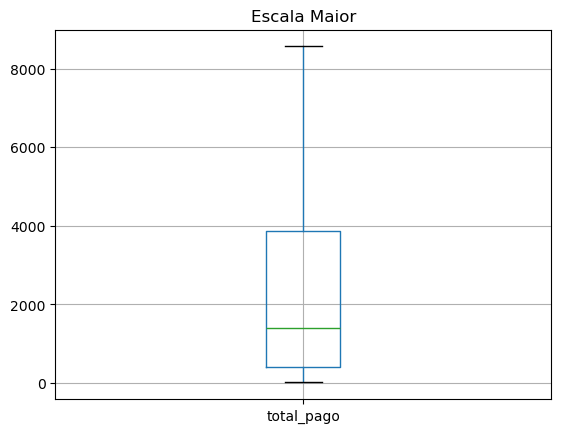

In [60]:
df[['total_pago']].boxplot()
plt.title('Escala Maior')
plt.show()

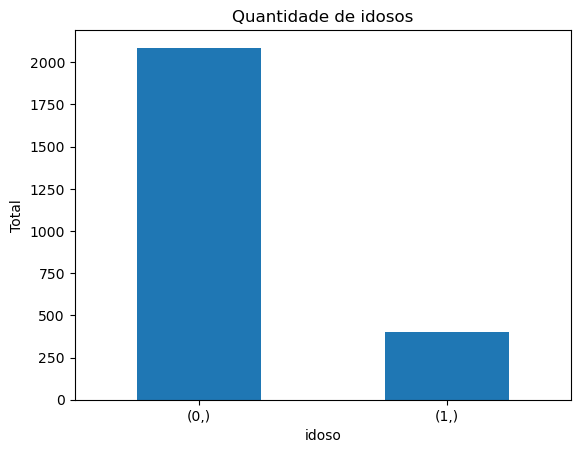

In [61]:
#Verificando quantidade de idosos na base
df[['idoso']].value_counts().plot(kind='bar')

plt.title('Quantidade de idosos')
plt.ylabel('Total')
plt.xticks(rotation=0)

plt.show()

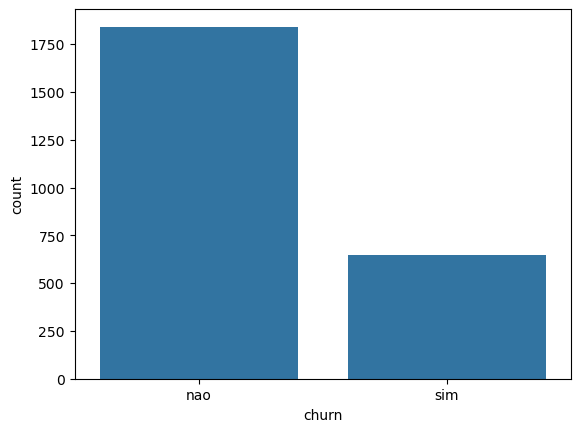

In [62]:
#Verificando quantidade de churn 
sns.countplot(data=df, x='churn')
plt.show()

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [63]:
# Não identifiquei nem um outlier

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

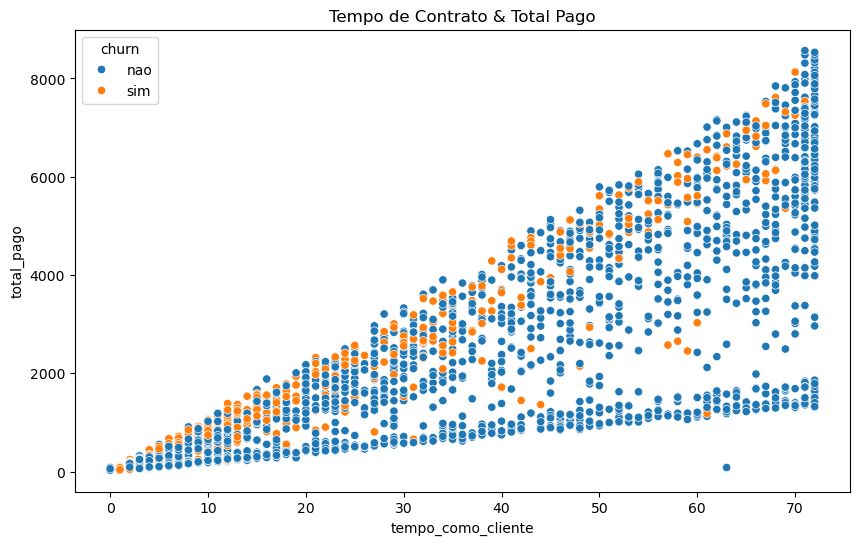

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo_como_cliente', y='total_pago', hue='churn')

plt.title('Tempo de Contrato & Total Pago')
plt.show()

#Aparentemante a taxa de churn está mais ligada ao total pago do que ao tempo como cliente

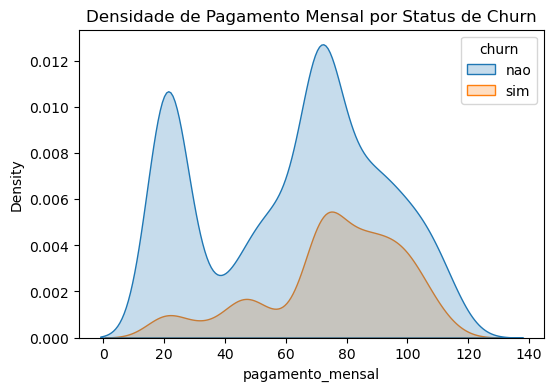

In [92]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='pagamento_mensal', hue='churn', fill=True)

plt.title('Densidade de Pagamento Mensal por Status de Churn')
plt.show()
# A maior taxa de churn está localizada onde o pagamento mensal e de 60 a 100

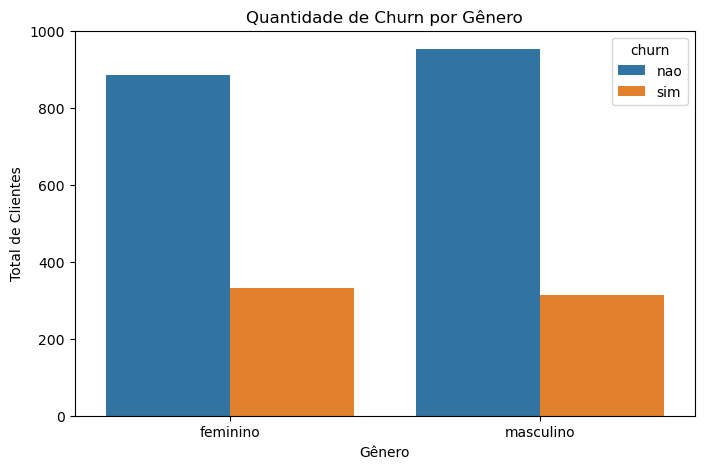

In [93]:
#Unificando colunas que estavam separadas
df['genero'] = df['genero'].replace({'f': 'feminino', 'm': 'masculino'})

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='genero', hue='churn')

plt.title('Quantidade de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Clientes')
plt.show()
#O gênero não parece estar influenciando diretamente no churn

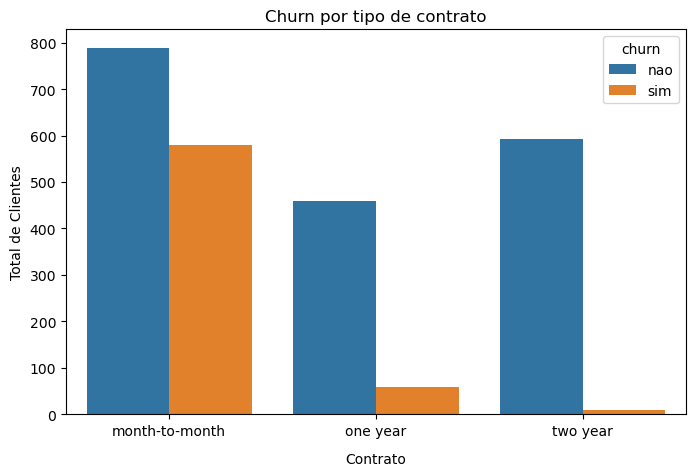

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tipo_contrato', hue='churn')

plt.title('Churn por tipo de contrato')
plt.xlabel('Contrato', labelpad=10)
plt.ylabel('Total de Clientes')
plt.show()
# Claramente os clientes que fazem pagamento mensal tem uma tendencia maior a abandonar o serviço

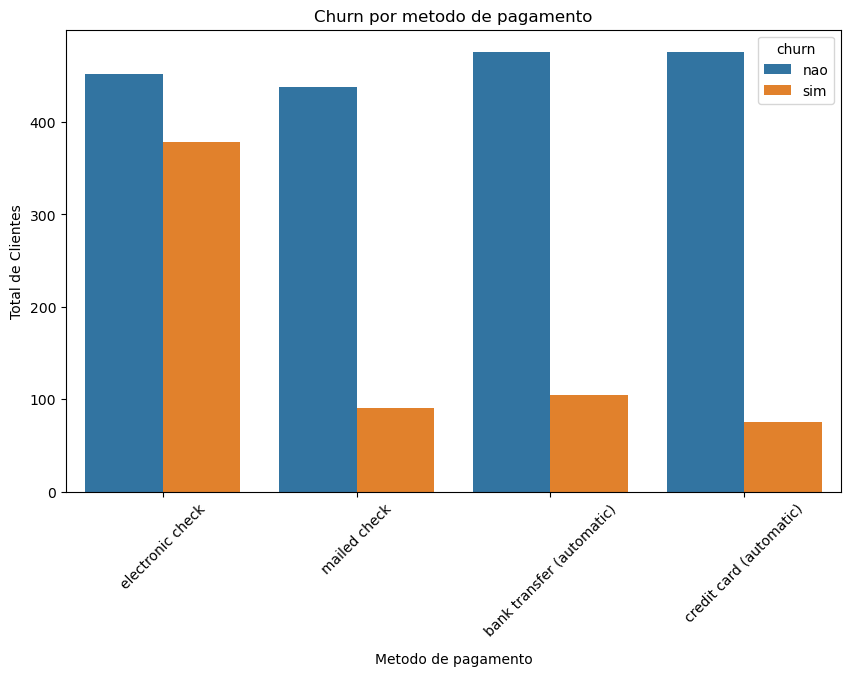

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='metodo_pagamento', hue='churn')

plt.title('Churn por metodo de pagamento')
plt.xlabel('Metodo de pagamento', labelpad=10)
plt.xticks(rotation=45)
plt.ylabel('Total de Clientes')
plt.show()
# Os clientes que fazem transferêncoa eletronica tem uma tendencia muito maior ao churn